In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Problem 1: Making Predictions on Movie Revenue Dataset
### An Example of Univariate Linear Regression

In [4]:
import pandas as pd
PATH='/content/drive/MyDrive'
movie_revenue_data=pd.read_csv(f'{PATH}/cereal_clean.csv')
movie_revenue_data

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,1.0,68.402973
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,1.0,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,1.0,59.425505
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,1.0,93.704912
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,1.0,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3,60,25,1.0,39.106174
73,Trix,110,1,1,140,0.0,13.0,12,25,25,1.0,27.753301
74,Wheat Chex,100,3,1,230,3.0,17.0,3,115,25,1.0,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3,110,25,1.0,51.592193


In [5]:
#Separating the feature into variable X
#X1=data['Production_Budget'] #extracts column as a series
#print(type(X))
X1=movie_revenue_data[['name']] #extracts column as a dataframe
X2=movie_revenue_data[['calories']] #extracts column as a dataframe
X3=movie_revenue_data[['protein']] #extracts column as a dataframe
X4=movie_revenue_data[['fat']] #extracts column as a dataframe
X5=movie_revenue_data[['sodium']] #extracts column as a dataframe
X6=movie_revenue_data[['fiber']] #extracts column as a dataframe
X7=movie_revenue_data[['carbo']] #extracts column as a dataframe
X8=movie_revenue_data[['sugars']] #extracts column as a dataframe
X9=movie_revenue_data[['potass']] #extracts column as a dataframe
X10=movie_revenue_data[['vitamins']] #extracts column as a dataframe
X11=movie_revenue_data[['weight']] #extracts column as a dataframe

Xc=movie_revenue_data[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','weight']] #extracts column as a dataframe

print(type(X1),type(X2),type(X3),type(X4),type(X5),type(X6),type(X7),type(X8),type(X9),type(X10),type(X11))
print(type(Xc))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
#Separating the target into variable X
Y1=movie_revenue_data[['rating']]
print(type(Y1))
Y1

<class 'pandas.core.frame.DataFrame'>


,rating
0,68.402973
1,33.983679
2,59.425505
3,93.704912
4,34.384843
...,...
72,39.106174
73,27.753301
74,49.787445
75,51.592193


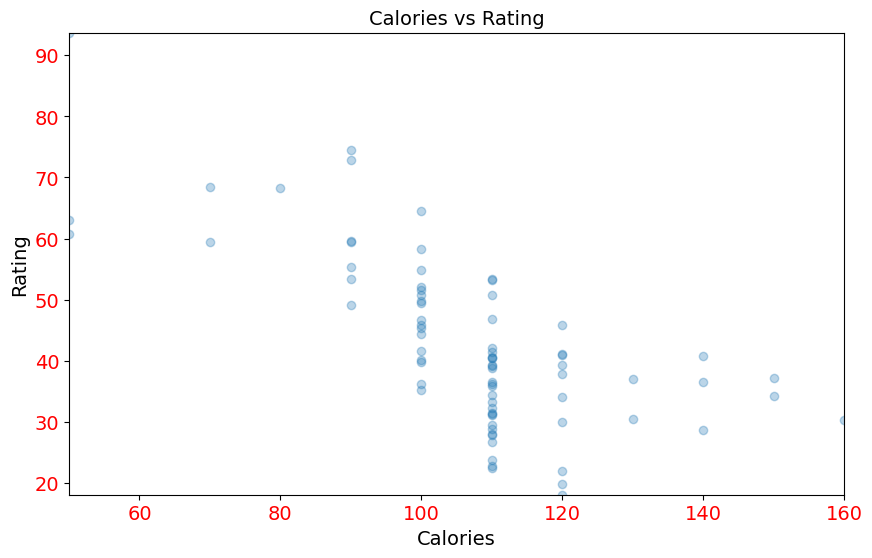

In [9]:
#Visualizing Data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X2,Y1,alpha=0.3) #alpha sets transparency of dots
plt.title('Calories vs Rating',fontsize=14)
plt.xlabel('Calories',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(X2.min().item(),X2.max().item())
plt.ylim(Y1.min().item(),Y1.max().item())
plt.show()

In [10]:
## Use code similar to this to read all weights
#Running multivariable linear regression
# Split data
X_train, X_test, y_train, y_test = train_test_split(Xc, Y1, train_size=0.8, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print('Training data r-square:', model.score(X_train, y_train))
print('Test data r-square:', model.score(X_test, y_test))

print('Intercept', model.intercept_)

#Regression coefficients for all features
pd.DataFrame(data=model.coef_[0], index=X_train.columns, columns=['coef'])

Training data r-square: 0.9999999999999997
Test data r-square: 0.9999999999999993
Intercept [54.92718424]


,coef
calories,-2.227242e-01
protein,3.273174e+00
fat,-1.691408e+00
sodium,-5.449270e-02
fiber,3.443480e+00
carbo,1.092451e+00
sugars,-7.248951e-01
potass,-3.399335e-02
vitamins,-5.121197e-02
weight,-7.271530e-08


In [12]:
#Reading values for parameters theta_0 and theta_1

#theta_0
t0=model.intercept_[0]
#theta_1
t1=model.coef_[0][0]
print('theta_0:',t0)
print('theta_1:',t1)

theta_0: 54.927184236484095
theta_1: -0.22272416441045512


In [13]:
#Reading R-square value (the goodness of fit)
model.score(X2,Y1)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- carbo
- fat
- fiber
- potass
- protein
- ...


In [14]:
#Making predictions

#Approach 1: Using the equation of linear regression
y1=t0+t1*5000000
print('Prediction 1:',y1)

#Approach 2: Using the predict method
y2=model.predict(pd.DataFrame([5000000]))
print('Prediction 2:',y2)

Prediction 1: -1113565.894868039


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 10 features as input.

In [21]:
#Making predictions for the whole dataset
y_all=model.predict(Xc)
print(y_all)
print("Maximum:", max(y_all))

# Find the maximum predicted rating and its name
movie_revenue_data['Predicted_Rating'] = y_all
max_predicted_row = movie_revenue_data.loc[movie_revenue_data['Predicted_Rating'].idxmax()]

print("\nCereal with Maximum Predicted Rating:")
print(max_predicted_row[['name', 'Predicted_Rating']])

[[68.40297276]
 [33.98367892]
 [59.42550465]
 [93.7049122 ]
 [34.38484319]
 [29.50954062]
 [33.17409438]
 [37.0385618 ]
 [49.12025277]
 [53.31381287]
 [18.04285076]
 [50.76499889]
 [19.82357262]
 [40.40020798]
 [22.73644637]
 [41.44501939]
 [45.86332446]
 [35.78279075]
 [22.39651286]
 [40.44877234]
 [64.53381602]
 [46.8956436 ]
 [36.17619619]
 [44.33085566]
 [32.20758149]
 [31.4359728 ]
 [58.34514148]
 [40.91704682]
 [41.01549178]
 [28.0257646 ]
 [35.25244381]
 [23.80404302]
 [52.0768966 ]
 [53.37100731]
 [45.81171591]
 [21.87129215]
 [31.07221728]
 [28.74241358]
 [36.52368332]
 [36.47151211]
 [39.24111421]
 [45.3280742 ]
 [26.7345154 ]
 [54.85091727]
 [37.13686306]
 [34.13976442]
 [30.31335105]
 [40.10596485]
 [29.92428525]
 [40.69232032]
 [59.64283668]
 [30.45084349]
 [37.84059393]
 [41.50354002]
 [60.75611181]
 [63.00564535]
 [49.51187438]
 [50.82839205]
 [39.25919727]
 [39.70339973]
 [55.33314205]
 [41.99893292]
 [40.56015885]
 [68.23588475]
 [74.47294876]
 [72.80178696]
 [31.23005

In [ ]:
# checking diff cost functions
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Mean Squared Error (MSE)
mse = mean_squared_error(Y1, y_all) # true output is stored in Y
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y1, y_all)
print("MSE :", mse)  # MSE : 2710041314785762.0
print("RMSE:", rmse) # RMSE: 52058057.1553123
print("MAE :", mae) # MAE : 30436740.157305535

In [ ]:
#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X1,Y1,alpha=0.3)
plt.title('Budget vs Revenue',fontsize=14)
plt.xlabel('Movie Budget $',fontsize=14)
plt.ylabel('Movie bRvenue $',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,450000000)
plt.ylim(0,1000000000)
plt.plot(X1,y_all,color='red',linewidth=4)
plt.show()

### An Altenate Model
### Applying Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1, Y1,test_size=0.2,random_state=0)
print('Size of original dataset (complete):',len(X1))
print('Size of train dataset (80%):',len(X1_train))
print('Size of test dataset (20%):',len(X1_test))

In [ ]:
#Let us now fit the model on train data and then check the r_squared value of both train and test sets
r2=LinearRegression()
r2.fit(X1_train,Y1_train)
print(r2.score(X1_train,Y1_train))
print(r2.score(X1_test,Y1_test))

## Problem 2: Making Predictions on the Given Dataset
### An Example of Multivariable Linear Regression

In [ ]:
data=pd.read_csv(f'{PATH}/cereal_clean.csv')
data

In [ ]:
## Use code similar to this to read all weights
#Running multivariable linear regression
model = LinearRegression()
model.fit(X_train, y_train)

print('Training data r-square:', model.score(X_train, y_train))
print('Test data r-square:', model.score(X_test, y_test))

print('Intercept', model.intercept_)

#Regression coefficients for all features
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])

In [24]:
# Making a prediction for one data point
# The input data should be in a DataFrame with the same column names as the training data (Xc)
single_data_point = pd.DataFrame([[49, 3.5, 0, 138, 17, 10, 0.5, 350, 10, 1]],
                                 columns=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight'])

predicted_rating = model.predict(single_data_point)
print("Predicted Rating for the single data point:", predicted_rating)

Predicted Rating for the single data point: [[104.64124092]]
